in 2022 re-evaluating the IBMQ data with 512 qubits able to reach theoretical limits with much much smaller error bars (basically more data points : larger absolute variance, fluctuates less relative to the appropriate CR bounds)

In [1]:
#just altering this slightly
import math
import certifi
# Importing standard Qiskit libraries and configuring account
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy import stats

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer,BasicAer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity

th=0.05
nrepT=10
nper=5
cname='ibmq_ehningen'
shotseff=4096

#THE REAL DATA ANALYSIS IN THIS FILE OCCURS AT THE BOTTOM, NOT HERE

In [2]:
def function_hist(a, ini, final,nbins):

    # 12 bins
#     bins = np.linspace(ini, final, nbins)
#     print(bins)
#     weightsa = np.ones_like(a)/float(len(a))
    #hist = np.histogram(np.array(a), bins, weights = weightsa)
    hist = np.histogram(a, nbins,[ini,final])
    return hist

0.29,0.59,1.24,1.68,3.64,4.9,8.83,11.17,15.61,22.71,21.51,34.15,28.73,40.35,34.51,33.38,32.3,25.38,24.67,14.88,15.17,7.74,6.92,3.97,2.43,1.3,0.74,0.46,0.2,0.15
0.29,0.59,1.24,1.68,3.64,4.9,8.83,11.17,15.61,22.71,21.51,34.15,28.73,40.35,34.51,33.38,32.3,25.38,24.67,14.88,15.17,7.74,6.92,3.97,2.43,1.3,0.74,0.46,0.2,0.15
0.04,0.13,0.29,0.57,0.84,2.18,3.73,6.82,11.09,15.87,22.29,28.66,35.68,39.71,41.53,41.5,37.55,32.83,25.43,19.3,13.79,8.74,5.55,2.92,1.48,0.83,0.38,0.14,0.09,0.04
-0.36026312631864443,-0.3370111076216939,-0.31375908892474336,-0.2905070702277929,-0.2672550515308423,-0.24400303283389177,-0.22075101413694126,-0.19749899543999072,-0.17424697674304018,-0.15099495804608964,-0.1277429393491391,-0.10449092065218857,-0.08123890195523809,-0.05798688325828755,-0.03473486456133701,-0.01148284586438647,0.011769172832564068,0.035021191529514606,0.058273210226465144,0.08152522892341568,0.10477724762036622,0.1280292663173167,0.1512812850142673,0.17453330371121778,0.19778532240816826,0.2210

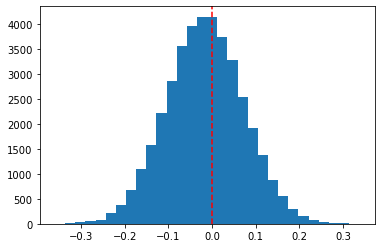

In [3]:
#for plotting histogram

mse=[]
mseMIT=[]
mseMIT_alt=[]
thestx=[]
thestMITx=[]
thestMIT_altx=[]

thesty=[]
thestMITy=[]
thestMIT_alty=[]

s1=str("_est_X")
s2=str("_est_Y")
p=0.5
shotseff=4096
grouping=8;
shotseff2=shotseff/grouping
th=0
today='2021-07-17'
today2='2021-07-18'

#estX1/2
#th=-0.05 is est_X1 and th=+0.05 is est_X2
# th=-0.05
# today='2021-07-19'
# today2='2021-07-20'
# s1=str("_est_X1")
# s2=str("_est_Y1")
# s1=str("_est_X2")
# s2=str("_est_Y2")
#_estX


#th=0
# p=0.7
# today='2021-07-30'
# today2='2021-07-30'
# th=0
# p=0.3
# today='2021-07-27'
# today2='2021-07-28'
# nrepT=10

n0T=[]
n1T=[]

mseins=[]

mseinsM_altWS=[]

msex=[]
msey=[]

n0T=0
n1T=0
n0MT=0
n1MT=0
n0Ty=0
n1Ty=0
n0MTy=0
n1MTy=0

n0MTA=0
n1MTA=0
n0MTyA=0
n1MTyA=0


histvec=[]
estXaltMIT2=[]
histreps=100
for histcountvecin in range(histreps):
    estXOG=[]
    estYOG=[]
    estX=[]
    estY=[]
    msealt=[]
    msealtOG=[]
    msealtX=[]
    msealtY=[]
    mserep=[]

    estXaltMIT=[]
    estYaltMIT=[]
    estXalt=[]
    estYalt=[]
    for totcount in range(nrepT):

        F = np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+s1+str("/")+str("estimates")+str(".npz")))
        F_MIT = np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+s1+str("/")+str("mitigated_estimates")+str(".npz")))
        F_MIT_alt = np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+s1+str("/")+str("alt_mitigated_estimates")+str(".npz")))
        Fy = np.load(str(cname+str("_LR")+str("/")+str(today2)+str('run')+str(totcount)+s2+str("/")+str("estimates")+str(".npz")))
        Fy_MIT = np.load(str(cname+str("_LR")+str("/")+str(today2)+str('run')+str(totcount)+s2+str("/")+str("mitigated_estimates")+str(".npz")))
        Fy_MIT_alt = np.load(str(cname+str("_LR")+str("/")+str(today2)+str('run')+str(totcount)+s2+str("/")+str("alt_mitigated_estimates")+str(".npz")))



        aaX=F['arr_0']
        aaX_MIT=F_MIT['arr_0'] 
        aaX_MIT_alt=F_MIT_alt['arr_0']
        aaY=Fy['arr_0']
        aaY_MIT=Fy_MIT['arr_0'] 
        aaY_MIT_alt=Fy_MIT_alt['arr_0']

        totdatX=np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+str("_est_X")+str("/")+str("training_data")+str(".npz")))
        totdatY=np.load(str(cname+str("_LR")+str("/")+str(today2)+str('run')+str(totcount)+str("_est_Y")+str("/")+str("training_data")+str(".npz")))
        True2QX=np.transpose(totdatX['arr_0'])[2]
        noisy2QX=np.transpose(totdatX['arr_0'])[0]
        clean2QX=np.transpose(totdatX['arr_0'])[1]

        True2QY=np.transpose(totdatY['arr_0'])[2]
        noisy2QY=np.transpose(totdatY['arr_0'])[0]
        clean2QY=np.transpose(totdatY['arr_0'])[1]

        #regression

        res2QXalt = stats.linregress(np.array(noisy2QX),np.array(True2QX))
        res2QYalt = stats.linregress(np.array(noisy2QY),np.array(True2QY))


        for new_count in range(nper):

            estsave=aaX[new_count]
            estYsave=aaY[new_count]
            estXOG.append(estsave)
            estYOG.append(estYsave)


            mseins.append((estsave-th)**2+(estYsave-th)**2)



            estxMIT_altWS=res2QXalt.intercept + estsave
            estyMIT_altWS=res2QYalt.intercept + estYsave



            mseinsM_altWS.append((estxMIT_altWS-th)**2+(estyMIT_altWS-th)**2)

            msex.append((estxMIT_altWS-th)**2)
            msey.append((estyMIT_altWS-th)**2)

            #generate false data to group into chunks
            n0x=((1-p)*4096*aaX[new_count]+4096)/2;
            n1x=4096-n0x;
            n0y=((1-p)*4096*aaY[new_count]+4096)/2;
            n1y=4096-n0y;

            #looping over this randomising part sufficiently many times to settle on the 'true' mse using this data
            for outside in range(1):

                xdata= np.ones(shotseff)
                xdata[:int(n0x)] = 0
                np.random.shuffle(xdata)

                ydata= np.ones(shotseff)
                ydata[:int(n0y)] = 0
                np.random.shuffle(ydata)

                for groupcount in range(grouping):
                    xdataint=xdata[int(groupcount*shotseff2):int((groupcount+1)*shotseff2)]
                    ydataint=ydata[int(groupcount*shotseff2):int((groupcount+1)*shotseff2)]
                    x1=np.count_nonzero(xdataint==1)
                    x0=np.count_nonzero(xdataint==0)
                    y1=np.count_nonzero(ydataint==1)
                    y0=np.count_nonzero(ydataint==0)

                    thx=(x0-x1)/(shotseff2*(1-p))
                    thy=(y0-y1)/(shotseff2*(1-p))

                    thx2=res2QXalt.intercept+thx
                    thy2=res2QYalt.intercept+thy
                    msealt.append((thx2-th)**2+(thy2-th)**2)

                    msealtOG.append((thx-th)**2+(thy-th)**2)

                    msealtX.append((thx2-th)**2)
                    msealtY.append((thy2-th)**2)

                    estXaltMIT.append(thx2)
                    estYaltMIT.append(thy2)
                    estXaltMIT2.append(thx2)

                    estXalt.append(thx)
                    estYalt.append(thy)


    #dataout=np.histogram(estXaltMIT,30,[-0.3,0.3])

    #         


            n0=((1-p)*4096*aaX[new_count]+4096)/2;
            n1=4096-n0;
            n1T=n1T+n1
            n0T=n0T+n0;

            n0=((1-p)*4096*aaY[new_count]+4096)/2;
            n1=4096-n0;
            n1Ty=n1Ty+n1
            n0Ty=n0Ty+n0;

            n0=((1-p)*4096*estxMIT_altWS+4096)/2;
            n1=4096-n0;
            n1MTA=n1MTA+n1
            n0MTA=n0MTA+n0;

            n0M=((1-p)*4096*estyMIT_altWS+4096)/2;
            n1M=4096-n0M;
            n1MTyA=n1MTyA+n1M
            n0MTyA=n0MTyA+n0M;


    #         mseinsM.append((estxMIT-th)**2)
    #         mseinsM_alt.append((estxMIT_alt-th)**2)
    #         mseinsMWS.append((estxMITWS-th)**2)
    #         mseinsM_altWS.append((estxMIT_altWS-th)**2)


    dataout=function_hist(estXaltMIT,-0.3,0.3,30)
    histvec.append(dataout[0])

#IVE ONLY COMMENTED BELOW TO MAKE THE HISTOGRAM INSET FIGURE
# print(np.mean(mseins))
# print("Without slope=",np.mean(mseinsM_altWS))

# print("Without slope x mse =",np.mean(msex))
# print("Without slope y mse =",np.mean(msey))
# expvar=1/(((1-p)**2)*shotseff);
# expvar2Q=2*(2-p+0.5*p**2)/(((1-p)**2)*shotseff*2);

# print("Single copy limit=",expvar*2)
# print("Two copy limit=",expvar2Q)

# print()
# print("new mse",np.mean(msealt),'+/-',np.var(msealt)**0.5)
# print("new OG mse",np.mean(msealtOG))

# print("x mse =",np.mean(msealtX))
# print("y mse =",np.mean(msealtY))
# expvar2=1/(((1-p)**2)*shotseff2);
# expvar2Q2=2*(2-p+0.5*p**2)/(((1-p)**2)*shotseff2*2);
# print("Single copy limit=",expvar2*2)
# print("Two copy limit=",expvar2Q2)

# print()
# print('estimated thx (new method)',np.mean(estXaltMIT))
# print('estimated thx (new method no mitigation)',np.mean(estXalt))
# print('estimated thy (new method)',np.mean(estYaltMIT))
# print('estimated thy (new method no mitigation)',np.mean(estYalt))

# plt.hist(estXaltMIT,30)
# plt.axvline(x=0, color='r', linestyle='--')

a_list=np.mean(histvec,axis=0)

converted_list = [str(element) for element in a_list]
joined_string = ",".join(converted_list)
print(joined_string)

countsout=np.histogram(estXaltMIT2,30,[-0.3,0.3])
a_list=countsout[0]/100
converted_list = [str(element) for element in a_list]
joined_string = ",".join(converted_list)
print(joined_string)


countsout,binsout=np.histogram(estXaltMIT2,30)
a_list=countsout/100
converted_list = [str(element) for element in a_list]
joined_string = ",".join(converted_list)
print(joined_string)
a_list=binsout
converted_list = [str(element) for element in a_list]
joined_string = ",".join(converted_list)
print(joined_string )


# 
print(np.sum(countsout[0]))
print(np.sum(np.mean(histvec,axis=0)))
print(len(estXaltMIT))

plt.hist(estXaltMIT2,30)
plt.axvline(x=th, color='r', linestyle='--')

In [4]:
a_list=binsout
converted_list = [str(element) for element in a_list]
joined_string = ",".join(converted_list)
print(joined_string )


-0.36026312631864443,-0.3370111076216939,-0.31375908892474336,-0.2905070702277929,-0.2672550515308423,-0.24400303283389177,-0.22075101413694126,-0.19749899543999072,-0.17424697674304018,-0.15099495804608964,-0.1277429393491391,-0.10449092065218857,-0.08123890195523809,-0.05798688325828755,-0.03473486456133701,-0.01148284586438647,0.011769172832564068,0.035021191529514606,0.058273210226465144,0.08152522892341568,0.10477724762036622,0.1280292663173167,0.1512812850142673,0.17453330371121778,0.19778532240816826,0.22103734110511886,0.24428935980206934,0.26754137849901993,0.2907933971959704,0.314045415892921,0.3372974345898715


In [5]:
#i think we also need to do a similar thing to bootstrapping to see how much the different configurations change the MSE
#this is only because I am not grouping the data into groups of 512 qubits myself. 
#okay yeah I think this is almost negligible


mse=[]
mseMIT=[]
mseMIT_alt=[]
thestx=[]
thestMITx=[]
thestMIT_altx=[]

thesty=[]
thestMITy=[]
thestMIT_alty=[]

s1=str("_est_X")
s2=str("_est_Y")
p=0.5
shotseff=4096
grouping=8;
shotseff2=shotseff/grouping
th=0
today='2021-07-17'
today2='2021-07-18'

#estX1/2
#th=-0.05 is est_X1 and th=+0.05 is est_X2
# th=-0.05
# today='2021-07-19'
# today2='2021-07-20'
# s1=str("_est_X1")
# s2=str("_est_Y1")
# s1=str("_est_X2")
# s2=str("_est_Y2")
#_estX


# th=0
# p=0.7
# today='2021-07-30'
# today2='2021-07-30'
# # th=0
# p=0.3
# today='2021-07-27'
# today2='2021-07-28'
# nrepT=10

n0T=[]
n1T=[]

mseins=[]

mseinsM_altWS=[]

msex=[]
msey=[]

n0T=0
n1T=0
n0MT=0
n1MT=0
n0Ty=0
n1Ty=0
n0MTy=0
n1MTy=0

n0MTA=0
n1MTA=0
n0MTyA=0
n1MTyA=0

estXOG=[]
estYOG=[]
estX=[]
estY=[]
msealt=[]
msealtOG=[]
msealtX=[]
msealtY=[]
mserep=[]

estXaltMIT=[]
estYaltMIT=[]
estXalt=[]
estYalt=[]
mseoutside=[]
for outside in range(1000):

    for totcount in range(nrepT):

        F = np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+s1+str("/")+str("estimates")+str(".npz")))
        F_MIT = np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+s1+str("/")+str("mitigated_estimates")+str(".npz")))
        F_MIT_alt = np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+s1+str("/")+str("alt_mitigated_estimates")+str(".npz")))
        Fy = np.load(str(cname+str("_LR")+str("/")+str(today2)+str('run')+str(totcount)+s2+str("/")+str("estimates")+str(".npz")))
        Fy_MIT = np.load(str(cname+str("_LR")+str("/")+str(today2)+str('run')+str(totcount)+s2+str("/")+str("mitigated_estimates")+str(".npz")))
        Fy_MIT_alt = np.load(str(cname+str("_LR")+str("/")+str(today2)+str('run')+str(totcount)+s2+str("/")+str("alt_mitigated_estimates")+str(".npz")))



        aaX=F['arr_0']
        aaX_MIT=F_MIT['arr_0'] 
        aaX_MIT_alt=F_MIT_alt['arr_0']
        aaY=Fy['arr_0']
        aaY_MIT=Fy_MIT['arr_0'] 
        aaY_MIT_alt=Fy_MIT_alt['arr_0']

        totdatX=np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+str("_est_X")+str("/")+str("training_data")+str(".npz")))
        totdatY=np.load(str(cname+str("_LR")+str("/")+str(today2)+str('run')+str(totcount)+str("_est_Y")+str("/")+str("training_data")+str(".npz")))
        True2QX=np.transpose(totdatX['arr_0'])[2]
        noisy2QX=np.transpose(totdatX['arr_0'])[0]
        clean2QX=np.transpose(totdatX['arr_0'])[1]

        True2QY=np.transpose(totdatY['arr_0'])[2]
        noisy2QY=np.transpose(totdatY['arr_0'])[0]
        clean2QY=np.transpose(totdatY['arr_0'])[1]

        #regression

        res2QXalt = stats.linregress(np.array(noisy2QX),np.array(True2QX))
        res2QYalt = stats.linregress(np.array(noisy2QY),np.array(True2QY))


        for new_count in range(nper):

            estsave=aaX[new_count]
            estYsave=aaY[new_count]
            estXOG.append(estsave)
            estYOG.append(estYsave)


            mseins.append((estsave-th)**2+(estYsave-th)**2)



            estxMIT_altWS=res2QXalt.intercept + estsave
            estyMIT_altWS=res2QYalt.intercept + estYsave



            mseinsM_altWS.append((estxMIT_altWS-th)**2+(estyMIT_altWS-th)**2)

            msex.append((estxMIT_altWS-th)**2)
            msey.append((estyMIT_altWS-th)**2)

            #generate false data to group into chunks
            n0x=((1-p)*4096*aaX[new_count]+4096)/2;
            n1x=4096-n0x;
            n0y=((1-p)*4096*aaY[new_count]+4096)/2;
            n1y=4096-n0y;

            #looping over this randomising part sufficiently many times to settle on the 'true' mse using this data


            xdata= np.ones(shotseff)
            xdata[:int(n0x)] = 0
            np.random.shuffle(xdata)

            ydata= np.ones(shotseff)
            ydata[:int(n0y)] = 0
            np.random.shuffle(ydata)

            for groupcount in range(grouping):
                xdataint=xdata[int(groupcount*shotseff2):int((groupcount+1)*shotseff2)]
                ydataint=ydata[int(groupcount*shotseff2):int((groupcount+1)*shotseff2)]
                x1=np.count_nonzero(xdataint==1)
                x0=np.count_nonzero(xdataint==0)
                y1=np.count_nonzero(ydataint==1)
                y0=np.count_nonzero(ydataint==0)

                thx=(x0-x1)/(shotseff2*(1-p))
                thy=(y0-y1)/(shotseff2*(1-p))

                thx2=res2QXalt.intercept+thx
                thy2=res2QYalt.intercept+thy
                msealt.append((thx2-th)**2+(thy2-th)**2)

                msealtOG.append((thx-th)**2+(thy-th)**2)

                msealtX.append((thx2-th)**2)
                msealtY.append((thy2-th)**2)

                estXaltMIT.append(thx2)
                estYaltMIT.append(thy2)

                estXalt.append(thx)
                estYalt.append(thy)




            n0=((1-p)*4096*aaX[new_count]+4096)/2;
            n1=4096-n0;
            n1T=n1T+n1
            n0T=n0T+n0;

            n0=((1-p)*4096*aaY[new_count]+4096)/2;
            n1=4096-n0;
            n1Ty=n1Ty+n1
            n0Ty=n0Ty+n0;

            n0=((1-p)*4096*estxMIT_altWS+4096)/2;
            n1=4096-n0;
            n1MTA=n1MTA+n1
            n0MTA=n0MTA+n0;

            n0M=((1-p)*4096*estyMIT_altWS+4096)/2;
            n1M=4096-n0M;
            n1MTyA=n1MTyA+n1M
            n0MTyA=n0MTyA+n0M;
        
    mseoutside.append(np.mean(msealt))

print(np.mean(mseoutside),'+/-',np.var(mseoutside)**0.5)

0.015533531308423465 +/- 4.791073311447145e-05


In [3]:
print("Bootstrapping:")
NT=n0T+n1T
p0=n0T/NT
p1=n1T/NT


NTy=n0Ty+n1Ty
p0y=n0Ty/NTy
p1y=n1Ty/NTy


NTMA=n1MTA+n0MTA

p0MA=n0MTA/NTMA
p1MA=n1MTA/NTMA

NTMyA=n1MTyA+n0MTyA
p0MyA=n0MTyA/NTMyA
p1MyA=n1MTyA/NTMyA

mseT=[]
mseTM=[]
mseTMA=[]
mseTMA2=[]
mseTMA2OG=[]
mseTMAtot=[]
mseTMAx=[]
mseTMAy=[]

estXog=[]
estYog=[]
estXa=[]
estYa=[]

mseTx2=[]
mseTy2=[]
for hh in range(1000):
    mseint=[]
    mseintM=[]
    mseintMA=[]
    mseintMA2=[]
    mseintMA2OG=[]
    mseintMAx=[]
    mseintMAy=[]
    
    msexint2=[]
    mseyint2=[]
    
    estXint=[]
    estYint=[]
    estXogint=[]
    estYogint=[]
    
    estXnew=[]
    estYnew=[]
    estXnewunMIT=[]
    estYnewunMIT=[]
    
    
    for kk in range(50):
       
        rv= np.random.multinomial(4096, [p0,p1], size=1)
        rvMA= np.random.multinomial(4096, [p0MA,p1MA], size=1)
        
        
        n0=rv[0][0]
        n1=rv[0][1]
        est=-1/((1-p))*(1/4096)*(n1-n0)
        estXogint.append(est)
        
        n0MA=rvMA[0][0]
        n1MA=rvMA[0][1]
        estMA=-1/((1-p))*(1/4096)*(n1MA-n0MA)
        estXint.append(estMA)
        
        rvy= np.random.multinomial(4096, [p0y,p1y], size=1)
        rvMyA= np.random.multinomial(4096, [p0MyA,p1MyA], size=1)
        
        n0=rvy[0][0]
        n1=rvy[0][1]
        esty=-1/((1-p))*(1/4096)*(n1-n0)
        estYogint.append(esty)
        
        
        n0MA=rvMyA[0][0]
        n1MA=rvMyA[0][1]
        estMyA=-1/((1-p))*(1/4096)*(n1MA-n0MA)
        estYint.append(estMyA)
        
        mseint.append((est-th)**2+(esty-th)**2)
        mseintMA.append((estMA-th)**2+(estMyA-th)**2)
        mseintMAx.append((estMA-th)**2)
        mseintMAy.append((estMyA-th)**2)
        
    for kk in range(50*grouping):
       
       
        rvMA= np.random.multinomial(shotseff2, [p0MA,p1MA], size=1)
   
        n0MA=rvMA[0][0]
        n1MA=rvMA[0][1]
        estMA=-1/((1-p))*(1/shotseff2)*(n1MA-n0MA)
        
        rv= np.random.multinomial(shotseff2, [p0,p1], size=1)
   
        n0=rv[0][0]
        n1=rv[0][1]
        est=-1/((1-p))*(1/shotseff2)*(n1-n0)
       
        
        
        rvMyA= np.random.multinomial(shotseff2, [p0MyA,p1MyA], size=1)
    
        n0MA=rvMyA[0][0]
        n1MA=rvMyA[0][1]
        estMyA=-1/((1-p))*(1/shotseff2)*(n1MA-n0MA)
        
        rvy= np.random.multinomial(shotseff2, [p0y,p1y], size=1)
    
        n0=rvy[0][0]
        n1=rvy[0][1]
        esty=-1/((1-p))*(1/shotseff2)*(n1-n0)
        
        
        mseintMA2.append((estMA-th)**2+(estMyA-th)**2)
        mseintMA2OG.append((est-th)**2+(esty-th)**2)
        
        msexint2.append((estMA-th)**2)
        mseyint2.append((estMyA-th)**2)
        
        estXnew.append(estMA)
        estYnew.append(estMyA)
        estXnewunMIT.append(est)
        estYnewunMIT.append(esty)
        
    mseT.append(np.mean(mseint))
    mseTMA.append(np.mean(mseintMA))
    mseTMA2.append(np.mean(mseintMA2))
    mseTMA2OG.append(np.mean(mseintMA2OG))
   
    mseTMAx.append(np.mean(mseintMAx))
    mseTMAy.append(np.mean(mseintMAy))
    
    mseTx2.append(np.mean(msexint2))
    mseTy2.append(np.mean(mseyint2))
    
    estXog.append(np.mean(estXnew))
    estYog.append(np.mean(estYnew))
    estXa.append(np.mean(estXnewunMIT))
    estYa.append(np.mean(estYnewunMIT))
    
print("og mse bootstrapped",np.mean(mseT))
print("+/-",np.var(mseT)**0.5)


print("EM mse without slope ",np.mean(mseTMA))
print("+/-",np.var(mseTMA)**0.5)

# print("EM mse without slope X",np.mean(mseTMAx))
# print("+/-",np.var(mseTMAx)**0.5)

# print("EM mse without slope Y",np.mean(mseTMAy))
# print("+/-",np.var(mseTMAy)**0.5)
print()
print('512 qubss')
print("EM mse new method ",np.mean(mseTMA2),"+/-",np.var(mseTMA2)**0.5)
print("EM mse new method OG",np.mean(mseTMA2OG),"+/-",np.var(mseTMA2OG)**0.5)

print("EM mse in x",np.mean(mseTx2),"+/-",np.var(mseTx2)**0.5)
print("EM mse in y",np.mean(mseTy2),"+/-",np.var(mseTy2)**0.5)

                 

print()
print('theta values (all new method):')
print(" thetax",np.mean(estXog),'+/-',np.var(estXog)**0.5)
print(" thetay",np.mean(estYog),'+/-',np.var(estYog)**0.5)
print('and without em')

print(" thetax",np.mean(estXa),'+/-',np.var(estXa)**0.5)
print(" thetay",np.mean(estYa),'+/-',np.var(estYa)**0.5)

Bootstrapping:
og mse bootstrapped 0.004724560031890869
+/- 0.0005361107301443472
EM mse without slope  0.002228230819702149
+/- 0.00031801307047267486

512 qubss
EM mse new method  0.01586727081298828 +/- 0.0007950855210795459
EM mse new method OG 0.018423472442626952 +/- 0.0008995316592190666
EM mse in x 0.008082826538085938 +/- 0.000570496114668696
EM mse in y 0.007784444274902344 +/- 0.0005780638995948217

theta values (all new method):
 thetax -0.0164676953125 +/- 0.004374333562348104
 thetay -0.0032514062499999995 +/- 0.004332360363540881
and without em
 thetax -0.051533515625000005 +/- 0.004590573402109615
 thetay 0.01031154296875 +/- 0.004388206238118942


In [74]:
print("+/-",np.var(mseTMA2OG)**0.5)

+/- 0.0009366664101133921


####  Also just bootstrapping one individual point to be sure that the error bars are teeny weeny

In [11]:
print(thx)
print(thy)

n0x=((1-p)*512*thx+512)/2;
n1x=512-n0x;
n0y=((1-p)*512*thy+512)/2;
n1y=512-n0y;

p0x=n0x/512;
p1x=n1x/512
p0y=n0y/512;
p1y=n1y/512

estyvec=[]
estxvec=[]
for kk in range(1000):
    estxint=[]
    estyint=[]
    for jj in range(400):

        rvy= np.random.multinomial(512, [p0y,p1y], size=1)
        n0=rvy[0][0]
        n1=rvy[0][1]
        esty=-1/((1-p))*(1/512)*(n1-n0)
        estyint.append(esty)

        rvx= np.random.multinomial(512, [p0x,p1x], size=1)
        n0=rvx[0][0]
        n1=rvx[0][1]
        estx=-1/((1-p))*(1/512)*(n1-n0)
        estxint.append(estx)
        
    estxvec.append(np.mean(estxint))
    estyvec.append(np.mean(estyint))
    
print(np.var(estxvec)**0.5)
print(np.var(estyvec)**0.5)

-0.109375
-0.0625
0.004356329874759505
0.0044074529676692165


### 2 qubit stuff below :

MSE no EM 0.005365009307861328
MSE W/O slope alt 0.0016336528986880437
MSE W/O slope X 0.0009340636409272852
MSE W/O slope Y 0.0006995892577607585
Single copy limit= 0.001953125
Two copy limit= 0.0015869140625

512 qubits
MSE alt 0.012667786046881402
MSE alt OG 0.01639914245605469
MSE alt x 0.006570659917111283
MSE alt y 0.006097126129770119
Single copy limit= 0.015625
Two copy limit= 0.0126953125

estimated thx (new method) -0.009380883014771042
estimated thx (new method no mitigation) -0.05497142401380256
estimated thy (new method) -0.0005178789622178094
estimated thy (new method no mitigation) -0.0040729865138025585


(array([1., 0., 0., 0., 0., 0., 3., 0., 1., 2., 4., 3., 3., 3., 6., 2., 5.,
        1., 1., 6., 3., 0., 1., 1., 1., 0., 1., 0., 0., 2.]),
 array([-0.13554216, -0.13058549, -0.12562882, -0.12067215, -0.11571548,
        -0.11075881, -0.10580214, -0.10084547, -0.0958888 , -0.09093213,
        -0.08597546, -0.08101879, -0.07606212, -0.07110545, -0.06614878,
        -0.06119211, -0.05623545, -0.05127878, -0.04632211, -0.04136544,
        -0.03640877, -0.0314521 , -0.02649543, -0.02153876, -0.01658209,
        -0.01162542, -0.00666875, -0.00171208,  0.00324459,  0.00820126,
         0.01315793]),
 <BarContainer object of 30 artists>)

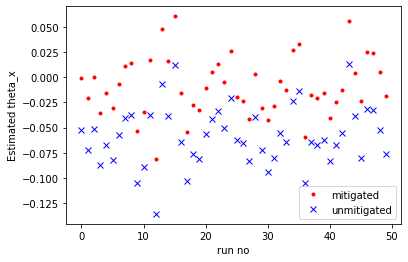

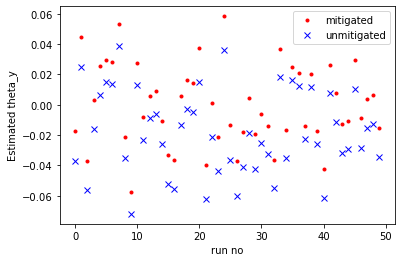

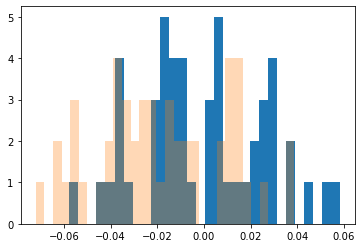

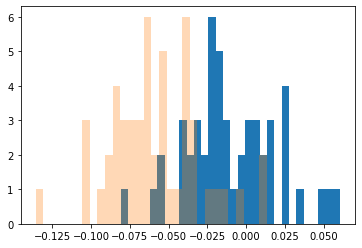

In [4]:
#2Q unbiased data analysis with bootstrapping.

mse=[]
mseMIT=[]
mseMIT_alt=[]
thestx=[]
thestMITx=[]
thestMIT_altx=[]

thesty=[]
thestMITy=[]
thestMIT_alty=[]

p=0.5
shotseff=4096
th=0
today='2021-07-22'
#2nd run
# th=-0.05
# today='2021-07-23'
#3rd run
# th=0.05
# today='2021-07-24'
# th=0
# p=0.7
# today='2021-07-26'
# # th=0
# p=0.3
# today='2021-07-25'
# nrepT=10
grouping=8

shotseff2=shotseff/grouping
n00T=[]
n01T=[]
n10T=[]
n11T=[]

chiX1 = 1/(1-p);
chiX2 = (3**(0.5)-1)/(2*(1-p));
chiX3 = -(3**(0.5)+1)/(2*(1-p));
chiX4 = 0;
chiY1 = -1/(1-p);
chiY2 = (3**(0.5)+1)/(2*(1-p));
chiY3 = (1-3**(0.5))/(2*(1-p));
chiY4 = 0;
mseins=[]
mseinsM=[]
mseinsM_alt=[]
mseinsMWS=[]
mseinsM_altWS=[]

gradX=[]
intX=[]
gradY=[]
intY=[]
gradXA=[]
gradYA=[]
intXA=[]
intYA=[]

thsave=[]
thsave2=[]

estXOG=[]
estYOG=[]
estX=[]
estY=[]
estXMIT=[]
estYMIT=[]
estXaltMIT=[]
estYaltMIT=[]

msex=[]
msey=[]

msealt=[]
msealt2=[]
msealtX=[]
msealtY=[]
for totcount in range(nrepT):
    
    FX = np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+str("_2Q_est_X")+str("/")+str("estimates")+str(".npz")))
    FX_MIT = np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+str("_2Q_est_X")+str("/")+str("mitigated_estimates")+str(".npz")))
    FX_MIT_alt = np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+str("_2Q_est_X")+str("/")+str("alt_mitigated_estimates")+str(".npz")))
    FY = np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+str("_2Q_est_Y")+str("/")+str("estimates")+str(".npz")))
    FY_MIT = np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+str("_2Q_est_Y")+str("/")+str("mitigated_estimates")+str(".npz")))
    FY_MIT_alt = np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+str("_2Q_est_Y")+str("/")+str("alt_mitigated_estimates")+str(".npz")))



    aaX=FX['arr_0']
    aaX_MIT=FX_MIT['arr_0'] 
    aaX_MIT_alt=FX_MIT_alt['arr_0']
    aaY=FY['arr_0']
    aaY_MIT=FY_MIT['arr_0'] 
    aaY_MIT_alt=FY_MIT_alt['arr_0']
    
    totdatX=np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+str("_2Q_est_X")+str("/")+str("training_data")+str(".npz")))
    totdatY=np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+str("_2Q_est_Y")+str("/")+str("training_data")+str(".npz")))
    True2QX=np.transpose(totdatX['arr_0'])[2]
    noisy2QX=np.transpose(totdatX['arr_0'])[0]
    clean2QX=np.transpose(totdatX['arr_0'])[1]
    
    True2QY=np.transpose(totdatY['arr_0'])[2]
    noisy2QY=np.transpose(totdatY['arr_0'])[0]
    clean2QY=np.transpose(totdatY['arr_0'])[1]
    
    #regression
   
    res2QXalt = stats.linregress(np.array(noisy2QX),np.array(True2QX))
    res2QYalt = stats.linregress(np.array(noisy2QY),np.array(True2QY))

    gradXA.append(res2QXalt.slope)
    gradYA.append(res2QYalt.slope)

    intXA.append(res2QXalt.intercept)
    intYA.append(res2QYalt.intercept)
    
    
    n00vec=np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+str("_2Q_est")+str("/")+str("n00vec")+str(".npz")))
    n01vec=np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+str("_2Q_est")+str("/")+str("n01vec")+str(".npz")))
    n10vec=np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+str("_2Q_est")+str("/")+str("n10vec")+str(".npz")))
    n11vec=np.load(str(cname+str("_LR")+str("/")+str(today)+str('run')+str(totcount)+str("_2Q_est")+str("/")+str("n11vec")+str(".npz")))

    n00vec=n00vec['arr_0']
    n01vec=n01vec['arr_0']
    n10vec=n10vec['arr_0']
    n11vec=n11vec['arr_0']

    for new_count in range(nper):
        n00T.append(n00vec[new_count])
        n01T.append(n01vec[new_count])
        n10T.append(n10vec[new_count])
        n11T.append(n11vec[new_count])
        n1=n00vec[new_count]
        n2=n01vec[new_count]
        n3=n10vec[new_count]
        n4=n11vec[new_count]
        estxnew=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4)*(1/shotseff)
        estynew=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4)*(1/shotseff)
        estsave=aaX[new_count]
        estYsave=aaY[new_count]
        
        estXOG.append(estxnew)
        estYOG.append(estynew)

        mseins.append((estxnew-th)**2+(estynew-th)**2)
        
        
        estxMIT_altWS=res2QXalt.intercept + estxnew
        estyMIT_altWS=res2QYalt.intercept + estynew
        
        estXMIT.append(estxMIT_altWS)
        estYMIT.append(estyMIT_altWS)

        
        mseinsM_altWS.append((estxMIT_altWS-th)**2+(estyMIT_altWS-th)**2)
        
        msex.append((estxMIT_altWS-th)**2)
        msey.append((estyMIT_altWS-th)**2)
        
        #generate false data to group into chunks
        n1
        n2
        n3
        n4

        #looping over this randomising part sufficiently many times to settle on the 'true' mse using this data
        for outside in range(1000):
            
            data1=np.ones(shotseff)
            data1[:int(n1)] = 0
            data1[int(n1):int(n1)+int(n2)] = 2
            data1[int(n2)+int(n1):int(n3)+int(n2)+int(n1)] = 3
            np.random.shuffle(data1)


            for groupcount in range(grouping):
                dataint=data1[int(groupcount*shotseff2):int((groupcount+1)*shotseff2)]
                
                n1t=np.count_nonzero(dataint==0)
                n2t=np.count_nonzero(dataint==2)
                n3t=np.count_nonzero(dataint==3)
                n4t=np.count_nonzero(dataint==1)
                
                thx=(chiX1*n1t+chiX2*n2t+chiX3*n3t+chiX4*n4t)*(1/shotseff2)
                thy=(chiY1*n1t+chiY2*n2t+chiY3*n3t+chiY4*n4t)*(1/shotseff2)

                thx2=res2QXalt.intercept+thx
                thy2=res2QYalt.intercept+thy
                
                msealt.append((thx2-th)**2+(thy2-th)**2)
                msealt2.append((thx-th)**2+(thy-th)**2)

                msealtX.append((thx2-th)**2)
                msealtY.append((thy2-th)**2)
                estXaltMIT.append(thx2)
                estYaltMIT.append(thy2)
                
                estXalt.append(thx)
                estYalt.append(thy)
        
        
    
print("MSE no EM",np.mean(mseins))

print("MSE W/O slope alt",np.mean(mseinsM_altWS))

print("MSE W/O slope X",np.mean(msex))
print("MSE W/O slope Y",np.mean(msey))

expvar=1/(((1-p)**2)*shotseff);
expvar2Q=2*(2-p+0.5*p**2)/(((1-p)**2)*shotseff*2);

print("Single copy limit=",expvar*2)
print("Two copy limit=",expvar2Q)

print()
print('512 qubits')
print("MSE alt",np.mean(msealt))
print("MSE alt OG",np.mean(msealt2))
print("MSE alt x",np.mean(msealtX))
print("MSE alt y",np.mean(msealtY))

expvar2=1/(((1-p)**2)*shotseff2);
expvar2Q2=2*(2-p+0.5*p**2)/(((1-p)**2)*shotseff2*2);

print("Single copy limit=",expvar2*2)
print("Two copy limit=",expvar2Q2)

print()
print('estimated thx (new method)',np.mean(estXaltMIT))
print('estimated thx (new method no mitigation)',np.mean(estXalt))
print('estimated thy (new method)',np.mean(estYaltMIT))
print('estimated thy (new method no mitigation)',np.mean(estYalt))


plt.plot(estXMIT,'r.')
plt.plot(estXOG,'bx')
plt.legend(['mitigated','unmitigated'])
plt.xlabel('run no')
plt.ylabel('Estimated theta_x')
plt.figure(2)
plt.plot(estYMIT,'r.')
plt.plot(estYOG,'bx')
plt.ylabel('Estimated theta_y')
plt.legend(['mitigated','unmitigated'])
plt.xlabel('run no')
nh=30
plt.figure(3)
plt.hist(estYMIT,nh)
plt.hist(estYOG,nh,alpha=0.3)
plt.figure(4)
plt.hist(estXMIT,nh)
plt.hist(estXOG,nh,alpha=0.3)

In [5]:
print("Bootstrapping")
n1=sum(n00T)
n2=sum(n01T)
n3=sum(n10T)
n4=sum(n11T)

mse=[]
mseMIT=[]
mseMIT_alt=[]
mseMITA=[]
mseMITA_alt=[]
mseMITA_alt2=[]
mseMITA_altOG=[]
msexBS=[]
mseyBS=[]
msexBS2=[]
mseyBS2=[]
shotsT=shotseff*50

p1=n1/shotsT
p2=n2/shotsT
p3=n3/shotsT
p4=n4/shotsT


interXA=np.mean(intXA)
interYA=np.mean(intYA)
slopeXA=np.mean(gradXA)
slopeYA=np.mean(gradYA)


import random
#so we can also bootstrap the theta data
thxT=[]
thyT=[]
thxM=[]
thyM=[]
thxA=[]
thyA=[]

estXog=[]
estYog=[]
estXa=[]
estYa=[]

for kkk in range(1000):
    mseint=[]
    mseintM=[]
    mseintM_alt=[]
    mseintMA=[]
    mseintMA_alt=[]
    mseintMA_alt2=[]
    
    mseintMA_altOG=[]
    mseXint=[]
    mseYint=[]
    mseXint2=[]
    mseYint2=[]
    
    estXint=[]
    estYint=[]
    estXogint=[]
    estYogint=[]
    
    thxint=[]
    thyint=[]
    
    thxintM=[]
    thyintM=[]
    
    thxint_alt=[]
    thyint_alt=[]
    estXnew=[]
    estYnew=[]
    estXnewunMIT=[]
    estYnewunMIT=[]
    
    for hhh in range(50):
        rv= np.random.multinomial(shotseff, [p1,p2,p3,p4], size=1)

        n1=rv[0][0]
        n2=rv[0][1]
        n3=rv[0][2]
        n4=rv[0][3]
        estxnew=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4)*(1/shotseff)
        estynew=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4)*(1/shotseff)
        
        estXogint.append(estxnew)
        estYogint.append(estynew)

        mseint.append((estxnew-th)**2+(estynew-th)**2)
        
        
        
        
        estxMITA_alt=interXA + estxnew
        estyMITA_alt=interYA + estynew
        
        
        mseintMA_alt.append((estxMITA_alt-th)**2+(estyMITA_alt-th)**2)
        
        mseYint.append((estyMITA_alt-th)**2)
        mseXint.append((estxMITA_alt-th)**2)
        
    for hhh in range(50*grouping):
        
        rv= np.random.multinomial(shotseff2, [p1,p2,p3,p4], size=1)

        n1=rv[0][0]
        n2=rv[0][1]
        n3=rv[0][2]
        n4=rv[0][3]
        estxnew=(chiX1*n1+chiX2*n2+chiX3*n3+chiX4*n4)*(1/shotseff2)
        estynew=(chiY1*n1+chiY2*n2+chiY3*n3+chiY4*n4)*(1/shotseff2)

        estxMITA_alt=interXA + estxnew
        estyMITA_alt=interYA + estynew
        
        
        mseintMA_alt2.append((estxMITA_alt-th)**2+(estyMITA_alt-th)**2)
        mseintMA_altOG.append((estxnew-th)**2+(estynew-th)**2)
        
        mseYint2.append((estyMITA_alt-th)**2)
        mseXint2.append((estxMITA_alt-th)**2)
        
        estXnew.append(estxMITA_alt)
        estYnew.append(estyMITA_alt)
        estXnewunMIT.append(estxnew)
        estYnewunMIT.append(estynew)
       
        
    estXog.append(np.mean(estXnew))
    estYog.append(np.mean(estYnew))
    estXa.append(np.mean(estXnewunMIT))
    estYa.append(np.mean(estYnewunMIT))
    
    mse.append(np.mean(mseint))
    mseMITA_alt.append(np.mean(mseintMA_alt))
    
    msexBS.append(np.mean(mseXint))
    mseyBS.append(np.mean(mseYint))
    
    mseMITA_alt2.append(np.mean(mseintMA_alt2))
    mseMITA_altOG.append(np.mean(mseintMA_altOG))
    
    msexBS2.append(np.mean(mseXint2))
    mseyBS2.append(np.mean(mseYint2))



expvar=1/(((1-p)**2)*shotseff);
expvar2Q=2*(2-p+0.5*p**2)/(((1-p)**2)*shotseff*2);

print("Bootstrapped unmitigated MSE=",np.mean(mse),"+/-",np.sqrt(np.var(mse)))
print("Single copy limit=",expvar*2)
print("Two copy limit=",expvar2Q)



print("bootstrapped alt mitigated MSE W/O slope=",np.mean(mseMITA_alt),"+/-",np.sqrt(np.var(mseMITA_alt)))
print()
print("bootstrapped alt mitigated MSE new errors=",np.mean(mseMITA_alt2),"+/-",np.sqrt(np.var(mseMITA_alt2)))

print("bootstrapped alt mitigated MSE new errors=",np.mean(mseMITA_altOG),"+/-",np.sqrt(np.var(mseMITA_altOG)))
print("Single copy limit=",expvar2*2)
print("Two copy limit=",expvar2Q2)
print()

print("bootstrapped alt mitigated MSE X=",np.mean(msexBS2),"+/-",np.sqrt(np.var(msexBS2)))
print("bootstrapped alt mitigated MSE Y=",np.mean(mseyBS2),"+/-",np.sqrt(np.var(mseyBS2)))



print()
print('theta values (all new method):')
print(" thetax",np.mean(estXog),'+/-',np.var(estXog)**0.5)
print(" thetay",np.mean(estYog),'+/-',np.var(estYog)**0.5)
print('and without em')

print(" thetax",np.mean(estXa),'+/-',np.var(estXa)**0.5)
print(" thetay",np.mean(estYa),'+/-',np.var(estYa)**0.5)

Bootstrapping
Bootstrapped unmitigated MSE= 0.005344298772811889 +/- 0.0005398673579588888
Single copy limit= 0.001953125
Two copy limit= 0.0015869140625
bootstrapped alt mitigated MSE W/O slope= 0.0016552783570532345 +/- 0.00023400706870538272

bootstrapped alt mitigated MSE new errors= 0.012700076767460393 +/- 0.0006409649662599133
bootstrapped alt mitigated MSE new errors= 0.01637831130981445 +/- 0.0008016370734050665
Single copy limit= 0.015625
Two copy limit= 0.0126953125

bootstrapped alt mitigated MSE X= 0.006544530238316788 +/- 0.00046117989641935756
bootstrapped alt mitigated MSE Y= 0.006155546529143605 +/- 0.0004390041667224796

theta values (all new method):
 thetax -0.00936348216507513 +/- 0.003958785250347873
 thetay -0.0004134273312718821 +/- 0.0037846065027654532
and without em
 thetax -0.05857779092790919 +/- 0.003958785250347872
 thetay -0.01829542764665919 +/- 0.0037846065027654532
